In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import signal

from tqdm import tqdm

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh
from ews_analysis.saddlenode_ews import dSdt as sd_model
from ews_analysis.pitchfork_helper import *
from ews_helper import get_ews, itoEulerMaruyama, get_acorr_decay_time

from scipy.integrate import odeint, solve_ivp


## Saddle-Node

In [2]:
def plot_bif_sim(fig, axs, time, results, derivatives):

    if not isinstance(axs, np.ndarray):
        axs = np.array([axs])
    
    axs[0].plot(time, results[:,0])
    axs[0].set_xlabel('Time')
    # make ax grey
    axs[0].set_facecolor(plt.cm.gray(.85))

    # plot t_star, where r(t) = 0 = r0 + epsilon*t 
    t_star = time[np.where(results[:,1] >= 0)[0][0]]
    axs[0].axvline(t_star, c='r', ls='--') #label=f't*={t_star:.2f}'

    # ax.set_ylim(-20, 70)
    # axs[0].legend()
    axs[0].grid()
    return fig, axs, t_star

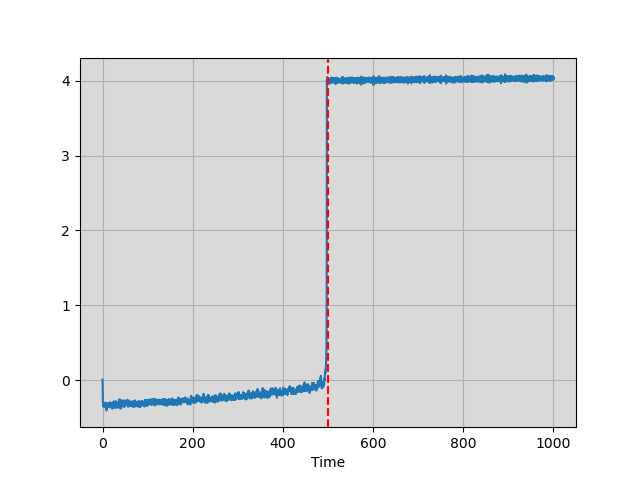

In [3]:
# f = np.load('tmp_figs/sd_bif_sim.npz')
f = np.load('tmp_figs/sd_with_yuval_bif.npz')

time=f['time'] 
results=f['results']
derivatives=f['derivatives']

fig, axs = plt.subplots(1)
fig, axs, t_star = plot_bif_sim(fig, axs, time, results, derivatives)

In [4]:
import ewstools
from ewstools.models import simulate_ricker

from IPython.display import Image

In [5]:
ts = ewstools.TimeSeries(data=results[:,0])

In [6]:
ts.transition

In [7]:
ts.state.head()

state
time          
0     0.010000
1    -0.042135
2    -0.087658
3    -0.131388
4    -0.160145

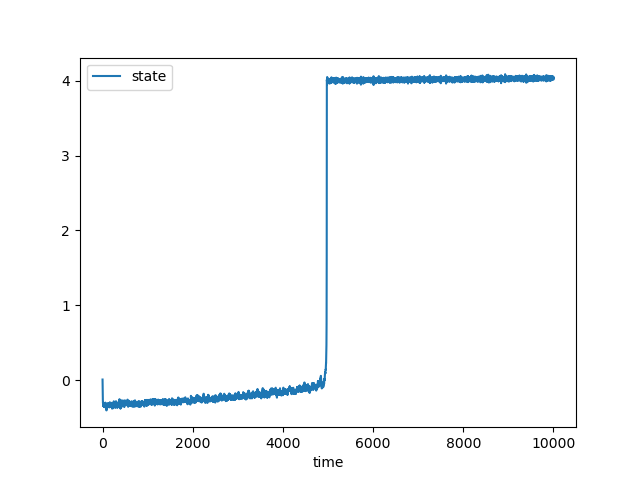

In [8]:
ts.state.plot();

In [9]:
# ts.detrend(method='Lowess', span=0.2)
# ts.detrend(method='Gaussian', span=0.2)
# ts.state.head()
# ts.state[['state','smoothing']].plot();

In [10]:
# Define rolling window length
rw = 301
ts.compute_var(rolling_window=rw)
ts.compute_cv(rolling_window=rw)
ts.compute_auto(rolling_window=rw, lag=3)
ts.compute_auto(rolling_window=rw, lag=5)
ts.compute_auto(rolling_window=rw, lag=10)
ts.compute_auto(rolling_window=rw, lag=15)
ts.compute_skew(rolling_window=rw)

In [11]:
ts.ews.dropna().head()

variance        cv       ac3       ac5      ac10      ac15      skew
time                                                                      
300   0.001485 -0.117551  0.743314  0.568751  0.221627 -0.007397  5.252069
301   0.001105 -0.101097  0.668578  0.472926  0.195152 -0.049214  4.753896
302   0.000832 -0.087497  0.574724  0.409527  0.154787 -0.072945  4.074658
303   0.000638 -0.076425  0.486010  0.369607  0.141665 -0.124599  3.209002
304   0.000505 -0.067887  0.424709  0.326761  0.113460 -0.139130  2.309279

In [12]:
ts.compute_ktau()

In [13]:
ts.ktau

{'variance': -0.24665150940207464,
 'cv': 0.3257707724146288,
 'ac3': -0.38149903858724943,
 'ac5': -0.35842351693181257,
 'ac10': -0.24543225308592767,
 'ac15': -0.028435921228992682,
 'skew': -0.23969162513299813}

In [14]:
fig = ts.make_plotly(kendall_tau=False)
Image(fig.to_image()) # use the command fig.show() if running a Jupyter notebook to view the interactive version
fig.show()

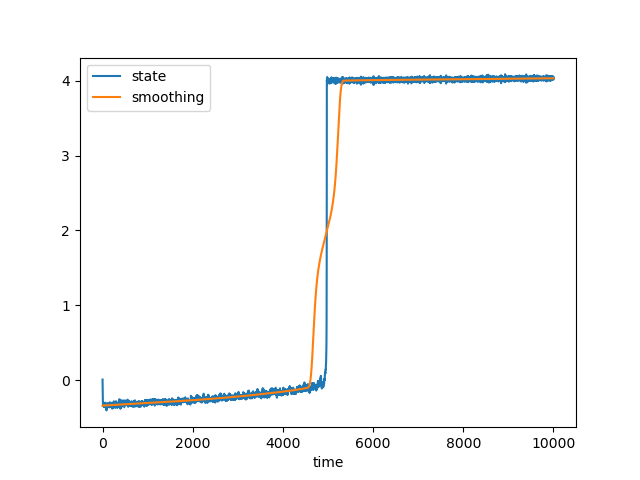

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2.4000000953674316, 'type': 'set_device_pixel_ratio'}


In [23]:
import plotly.express as px

ts.detrend(method='Lowess', span=0.2)
ts.state[['state','smoothing']].plot();


In [34]:
# ts.pspec.head()

ts.compute_spectrum(rolling_window=0.5, ham_length=40)
fig = px.line(ts.pspec, facet_col_wrap=25)
Image(fig.to_image())
fig.show()

In [36]:
ts.pspec.head()

frequency     power    time
0  -3.141593  0.000003  4999.0
1  -2.984513  0.000003  4999.0
2  -2.827433  0.000002  4999.0
3  -2.670354  0.000002  4999.0
4  -2.513274  0.000003  4999.0

In [38]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1

x = ts.pspec  # the signal
NFFT = win_size  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot( x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=offset)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

NameError: name 'win_size' is not defined